**In this notebook, we are going to learn three widely used clustering models.**

<font color='red'>Question:</font> What are supervised learning and unsupervised learning?

**ANS**
* Supervised learning is typically done in the context of classification, when we want to map input to output labels, or regression, when we want to map input to a continuous output. Common algorithms in supervised learning include logistic regression, naive bayes, support vector machines, artificial neural networks, and random forests. In both regression and classification, the goal is to find specific relationships or structure in the input data that allow us to effectively produce correct output data. 


* In unsupervised learning, we wish to learn the inherent structure of our data without using explicitly-provided labels. Some common algorithms include k-means clustering, principal component analysis, and autoencoders. Since no labels are provided, there is no specific way to compare model performance in most unsupervised learning methods.Two common use-cases for unsupervised learning are exploratory analysis and dimensionality reduction.

<font color='red'>Question:</font> Why unsupervised learning is important?

**ANS**

It is important is we are not always given the labels of the data. For example, when we try to segment customers, we do not know before hand how many groups customers will belong to.

**Unsupervised learning is idea for exploring raw and unknown data, and it is closer to human cognitive functions**

# *k*-Means

## Modeling

<font color='red'>Assignment:</font> Load the data in '../data/clustering.csv' into a DataFrame **df**, and plot the data in **df**.

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
df = pd.read_csv("clustering.csv")
df.head()

,x1,x2
0,3.101246,6.183914
1,1.083915,12.311124
2,-4.100572,50.639475
3,-3.350454,104.422200
4,-4.256006,52.260368


<font color='red'>Question:</font> How many clusters do you think there are?

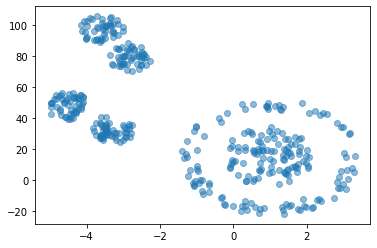

In [3]:
# Visulaize the data
plt.scatter(df["x1"], df["x2"], alpha=0.5)

**ANS**

3 (or 6 clusters ?? open question)

<font color='red'>Assignment:</font> Train a **KMeans** model with the data in **df**. Set **n_cluster** the number of clusters which you think is reasonable.

In [4]:
# KMeans clustering

clf = KMeans(n_clusters=3)
clf.fit(df)

KMeans(n_clusters=3)

<font color='red'>Question:</font> What information does the attribute **label_** of **KMeans** provide?

In [5]:
labels = clf.labels_
labels

array([1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2,
       0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0,
       1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2,
       1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2,
       0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2,

**ANS**
<br>It gives the label (cluster number) of each data point.

<font color='red'>Assignment:</font> Visualize the clustering results. **Hint:** use **plt.scatter(x, y, c=z)**.

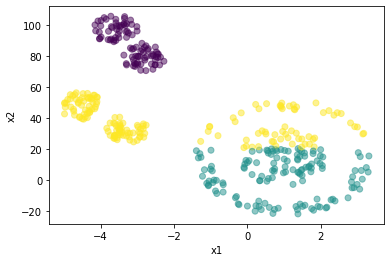

In [7]:
plt.scatter(df["x1"], df["x2"], alpha=0.5, c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

<font color='red'>Question:</font> Do you think the result is reasonable? What is the reason? How can you solve it? **Hint:** Re-plot the clustering results with **plt.axis('equal')**.

**ANS**

No. Because the data points are widely spreaded in x2 direction, but very tight in x1 drection. The issue can be solved by rescaling the data.

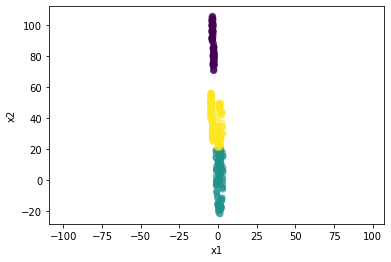

In [8]:
plt.scatter(df["x1"], df["x2"], alpha=0.5, c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

<font color='red'>Assignment:</font> Rescale the data in **df** and assign them to a variable X. Re-do the above steps with X.

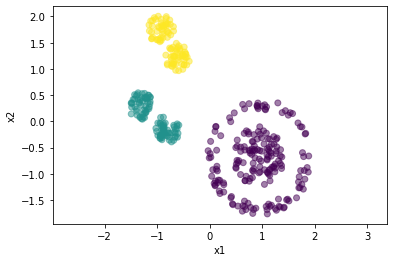

In [9]:
# KMeans clustering rescaled

X = pd.DataFrame(StandardScaler().fit_transform(df), columns=["x1", "x2"])
clf = KMeans(n_clusters=3)
clf.fit(X)
labels = clf.labels_
plt.scatter(X["x1"], X["x2"], alpha=0.5, c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

<font color='red'>Question:</font> Do you think it is more reasonable now? Can you describe how **KMeans** works? How **centroids** are initialized and updated? How does the model determine which cluster a data point belongs to?

**ANS**

* Yes, but still not ideal with the ring-shaped data.


* KMeans 
    1. First initializes n_clusters of centroids, then assigns every data point to the closest centroid. Data assigned to the same centriod will form a cluster. 
    2. Then update the centroid location as the center of the newly formed clusters. The assigning and centroids updating steps are repeated until a stop condition is met (e.g. centriods no longer move, data stays in the same cluster, max iteration reached)


* Centriods can be randomly initialized (or k-means++). They are updated as the center of newly formed clusters.


* A data point belongs to the closest cluster (smallest distance between the data and the cluster centroid)


<font color='red'>Question:</font> What are the important hyperparameters for **KMeans**? How do they affect results?

**ANS**

1. n_clusters: number of clusters. A good n_clusters depends on the data distribution. A badly selected n_clusters will lead to terrible clustering.


2. init: method for centroid initialization. KMeans usually converges to a local optimal. Centroids should better be initialized away from each other for better clustering.


3. n_init: number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

## Elbow Method

<font color='red'>Question:</font> What information does attribute **inertia_** of **KMeans** provide?

**ANS**
<br>Sum of squared distances of data points to their closest cluster center.

<font color='red'>Assignment:</font> Plot **inertia_** value versus **n_clusters**.

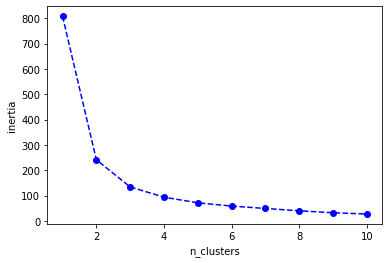

In [10]:
# inertia_ vs n_clusters

n_clusters = range(1, 11)
inertias = []
for num in n_clusters:
    clf = make_pipeline(StandardScaler(), KMeans(n_clusters=num))
    clf.fit(df)
    inertias.append(clf[1].inertia_)
plt.plot(n_clusters, inertias, "bo--")
plt.xlabel("n_clusters")
plt.ylabel("inertia")
plt.show()

<font color='red'>Question:</font> How many clusters (or which **k**) should we choose here? Is it consistent with what you found in the figure?

**ANS**
<br>3 or 4.

<font color='red'>Question:</font> What is **Elbow Method**? Does it always work?

**ANS**

Plot the target (inertia) as a function of the variable (n_clusters), pick the point where the plot shows an elbow as the selected variable value. It does not work well especially when the data points are not very clustered.

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

Assumption of k-means:
    1. Spherical shape clusters
    2. each cluster have roughly same number of data
    
example:

https://github.com/christopherjenness/DBCV

# Hierarchical Clustering

## Modeling

<font color='red'>Assignment:</font> Train an **AgglomerativeClustering** model with **X**.

In [11]:
# Hierarchical clustering

clf = AgglomerativeClustering(n_clusters=4, affinity="l2", linkage="single")
clf.fit(X)
labels = clf.labels_

<font color='red'>Assignment:</font> Visualize the clustering results.

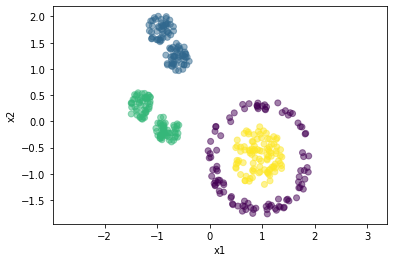

In [12]:
plt.scatter(X["x1"], X["x2"], alpha=0.5, c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

<font color='red'>Question:</font> How does hierarchecial clustering work?

**ANS**
<br>1. Let every data point be a cluster and compute the prxoimity matrix
<br>2. Repeatedly merge the two closest clusters and update the proximity matrix
<br>3. Stop when only one (or a specified number of) cluster remains

<font color='red'>Question:</font> What are the important hyperparameters for **AgglomerativeClustering**? How do they affect results?

**ANS**

1. n_clusters: number of clusters. A good n_clusters depends on the data distribution. A badly selected n_clusters will lead to terrible clustering.


2. affinity: the affinity (distance metric) will influence the clusters shape. Same two data points may have different distance under different affinity.


3. linkage: linkage determines the similarity between two clusters. Single (min) linkage can handel non-convex shape, but sensitie to noise. Complete (max) linage is robust against noise, but biased towards globular clusters and tends to break large clusters. Average and ward linkages are robust against noise, but biased towards globular clusters.

## Dendrogram

**Example:** Plot dendrogram of hierarchical clustering results. Here we use **linkage** in **scipy** to reproduce the results of **AgglomerativeClustering** model.

In [ ]:
(x1, y1), (x2, y2)

l1: abs(x1 - x2) + abs(y1-y2)
l2: (x1 - x2)^2 + (y1-y2)^2

Text(0, 0.5, 'distance')

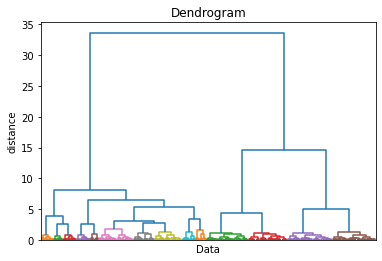

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix, color_threshold=2.0)
plt.title('Dendrogram')
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('distance')

# DBSCAN

<font color='red'>Assignment:</font> Train a **DBSCAN** model with **X**.

In [14]:
# DBSCAN clustering

clf = DBSCAN()
clf.fit(X)
labels = clf.labels_
print(np.unique(labels))

[0 1 2]


<font color='red'>Assignment:</font> Visualize the clustering results.

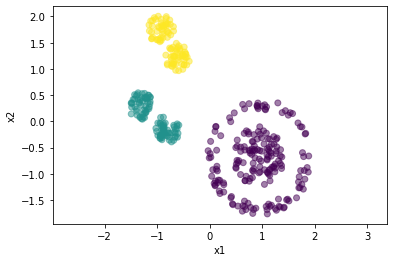

In [15]:
plt.scatter(X["x1"], X["x2"], alpha=0.5, c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

<font color='red'>Assignment:</font> Tune hyperparameters to make the clustering results more reasonable.

In [31]:
# Visualize DBSCAN clustering after tuning hyperparameters

clf = DBSCAN(eps=0.3, min_samples=4)
# clf = DBSCAN(eps=0.2, min_samples=15)

clf.fit(X)
labels = clf.labels_
print(np.unique(labels))

[0 1 2 3]


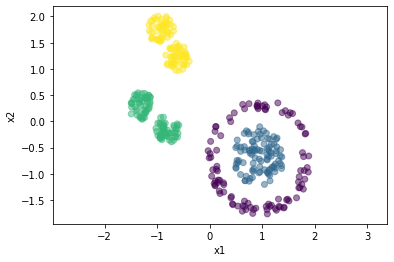

In [32]:
plt.scatter(X["x1"], X["x2"], alpha=0.5, c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

<font color='red'>Question:</font> How does **DBSCAN** work?

**ANS**

1. Radnomly select a data point, if there are min_samples of data points (including the selected data) in the neighborhood of that point, these data are considered as core points.


2. Starting from the core points, reaching out to points in the neighborhood of the core points and including them into the cluster, until no more points are reachable. Then one cluster is formed.


3. Looking for new core points to form new cluster, until no more core points can be found. The unclustered points are noise points.

<font color='red'>Question:</font> What are the important hyperparameters for **DBSCAN**? How do they affect results?

**ANS**

1. eps: the maximum distance between two data points to be considered as in the neighborhood of each other. If eps is too small, lots of data points won't be clustered. If eps is too large, close clusters tends to merge into a single major cluster.


2. min_samples: minimum number of samples as core points to form a cluster. The larger min_sample, the larger size of the smallest cluster. A larger value is good for noisy data and a good starting point is 2*dimension.

<font color='red'>Question:</font> Do we need to set the number of clusters in **DBSCAN**? Why or why not?

**ANS**

No, the number of clusters in DBSCAN is determined from the data density distribution (eps and min_samples)